# PCA and handwritten digit identification

From *J. Vanderplas*: https://jakevdp.github.io/PythonDataScienceHandbook/

---

## Get the data: 


**Optical recognition of handwritten digits dataset** from `scikit-learn`


Data Set Characteristics:

* Number of Instances: 5620
* Number of Attributes: 64
* Attribute Information: 8x8 image of integer pixels in the range 0..16.
* Missing Attribute Values: None
* Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
* Date: July; 1998

In [83]:
from sklearn.datasets import load_digits
digits = load_digits()

`digits` is a *dictionary* of **key:object** pairs

In [84]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

The last object is the DESCRiption.

In [85]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
digits.images.shape

(1797, 8, 8)

or with smoothing

---

## How many dimensions does this problem live in?

---

A single **instance** of this data, the thing we are trying to model, is a *single image*.

An *image* is an 8$\times$8 matrix of integers, between 0 and 16, inclusive.

In [86]:
digits.images[100]

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

What digit is this matrix an image of?

---

The number of independent values is: **8$\times$8 = 64**.

So an *image* corresponds to a '*point*' in a 64-dimensional space: $\mathbb{R}^{64}$.

Recall:

* 0-Dimensions: a Point $\rightarrow \mathbb{R}^0$
* 1-Dimensions: a Line $\rightarrow \mathbb{R}^1$
* 2-Dimensions: a Plane $\rightarrow \mathbb{R}^2$
* 3-Dimensions: a Solid Volume $\rightarrow \mathbb{R}^3$

Here\'s how we think of one of these "*points in $\mathbb{R}^{64}$*"

<IPython.core.display.Javascript object>


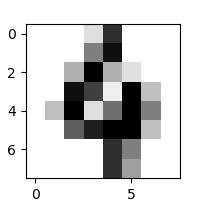

In [33]:
%matplotlib notebook

plt.figure(figsize=(2,2))
plt.imshow(digits.images[100], cmap='gray_r') #, interpolation='spline16')

or with smoothing

<IPython.core.display.Javascript object>


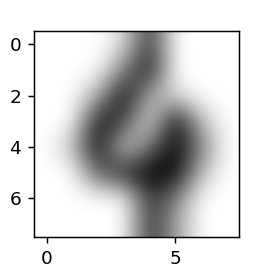

In [87]:
%matplotlib notebook

plt.figure(figsize=(2,2))
plt.imshow(digits.images[100], cmap='gray_r', interpolation='bicubic')

Here are a few more examples.

<IPython.core.display.Javascript object>


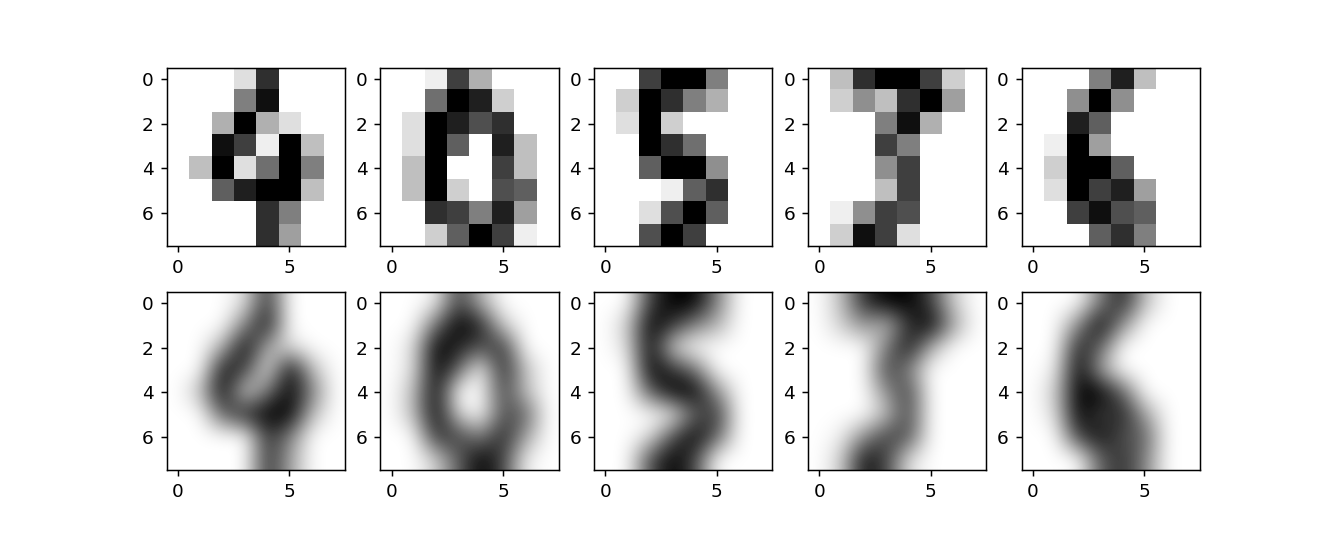

In [88]:
%matplotlib notebook

i = 100
plt.figure(figsize=(10,4))
for j in range(5):
    plt.subplot(2,5,1+j)
    plt.imshow(digits.images[i], cmap='gray_r')
    i += 1
i = 100
for j in range(5):
    plt.subplot(2,5,6+j)
    plt.imshow(digits.images[i], cmap='gray_r', interpolation='bicubic')
    i += 1

---

$$-\infty-$$

---

## PCA in $\mathbb{R}^{64}$

What numbers will be confusing to distinguish?

8 and 6?

9 and 3 and 5?

---

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


<IPython.core.display.Javascript object>


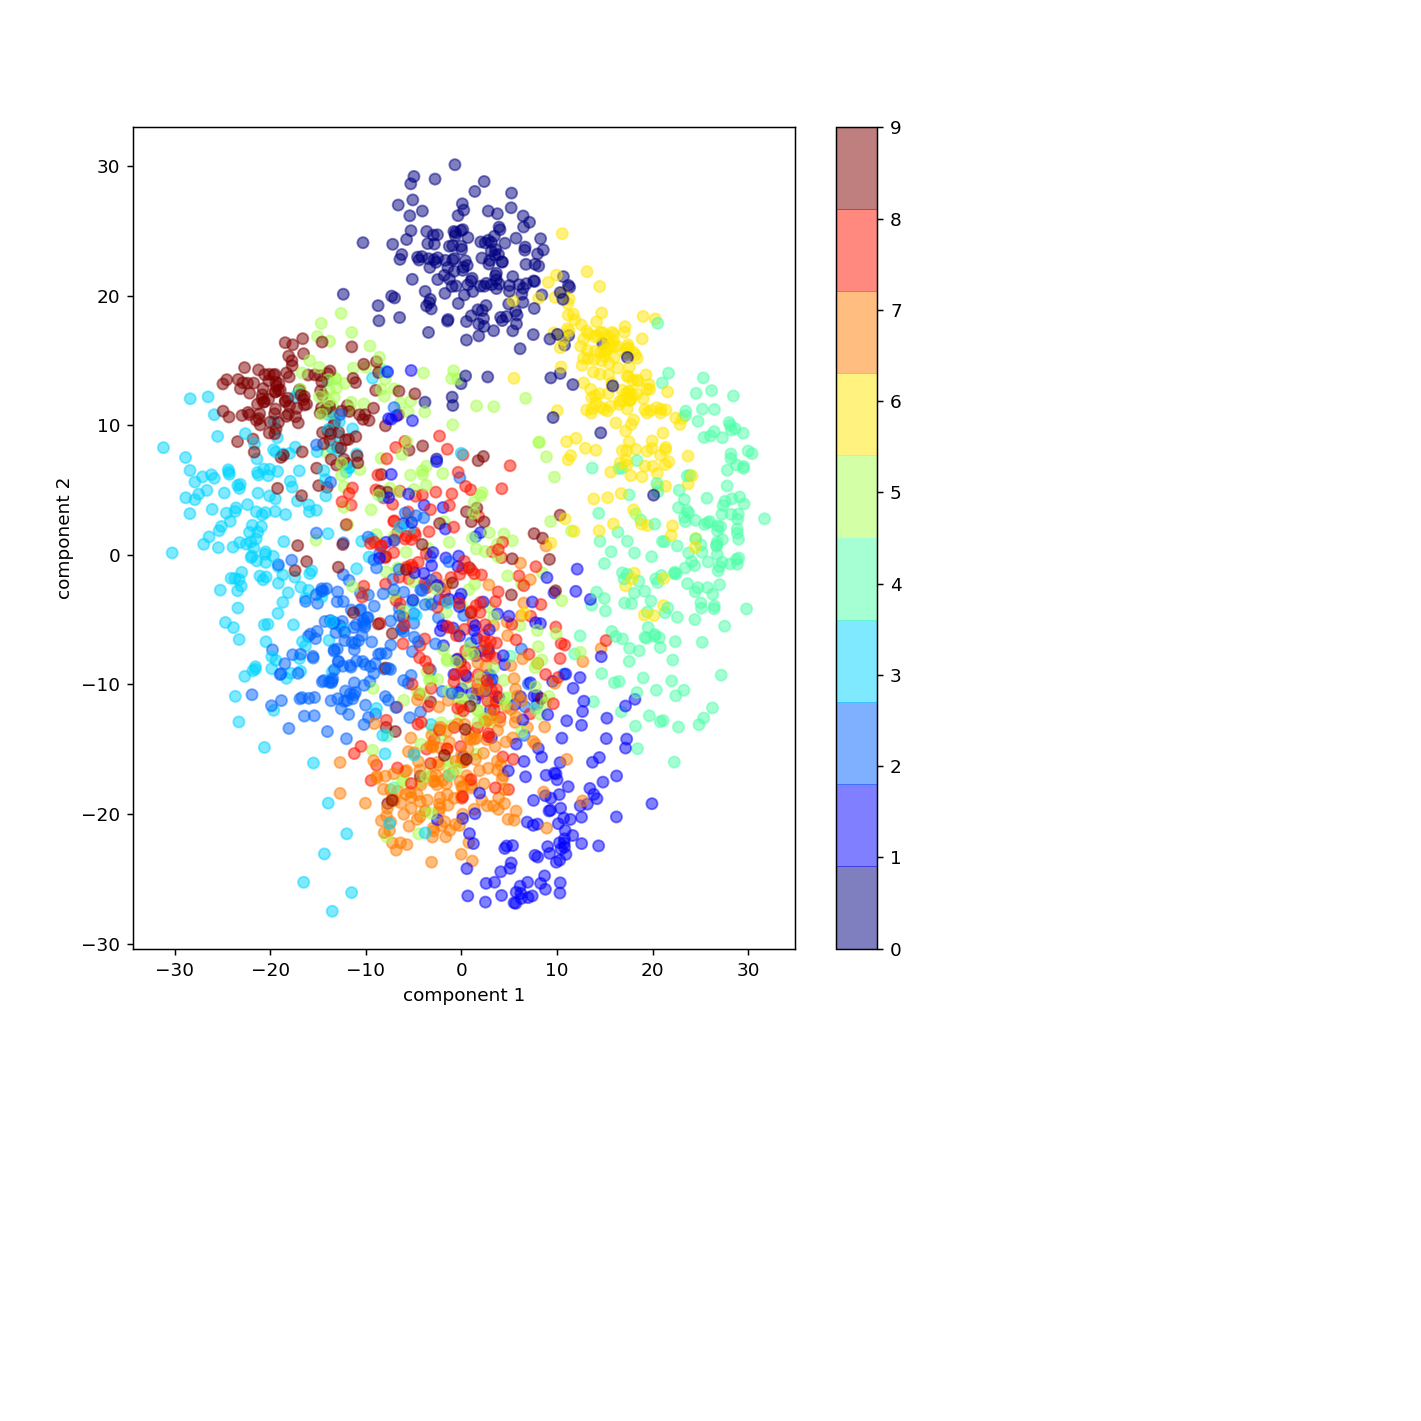

In [91]:
%matplotlib notebook

plt.figure(figsize=(8,8))
plt.scatter(projected[:, 0], projected[:, 1], 
   c=digits.target, alpha=0.5,
   cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();